Project topic:
This project is about determining the correlation academic performance of a student based on their study habits and past academic history.
We would like to use this data to determince an optimal correlation between all of these factors using Multiple Linear Regression. 

The motivation for this project is dual intent. Of course, this is a study based. However, it does solve a real world, applied problem.
Finding the best study / life balances can be used to encourage certain routines and habbits to enhance the performance of their peers and also predicting a students future results if they keep their habits.

Data: For this project we are using a dataset provided by Kaggle. (https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression?resource=download)

The data consists of 10000 rows worth of student records, with each record containing the following information:
Please note that the data is in one file with no auxilary items.

Hours Studied: The total number of hours spent studying by each student.
Previous Scores: The scores obtained by students in previous tests.
Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
Sleep Hours: The average number of hours of sleep the student had per day.
Sample Question Papers Practiced: The number of sample question papers the student practiced.

Target Variable:
Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

Data cleaning:

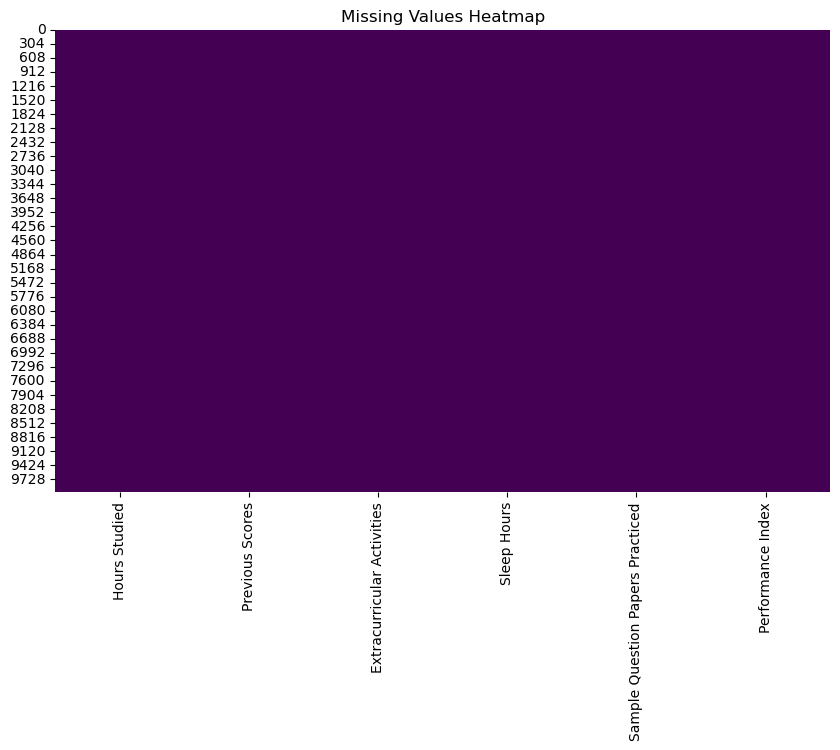

Missing values in each column:
 Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64
Missing values after handling:
 Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64
Hours Studied                          int64
Previous Scores                        int64
Extracurricular Activities          category
Sleep Hours                            int64
Sample Question Papers Practiced       int64
Performance Index                    float64
dtype: object
Number of duplicate rows: 127
Number of duplicate rows after removal: 0


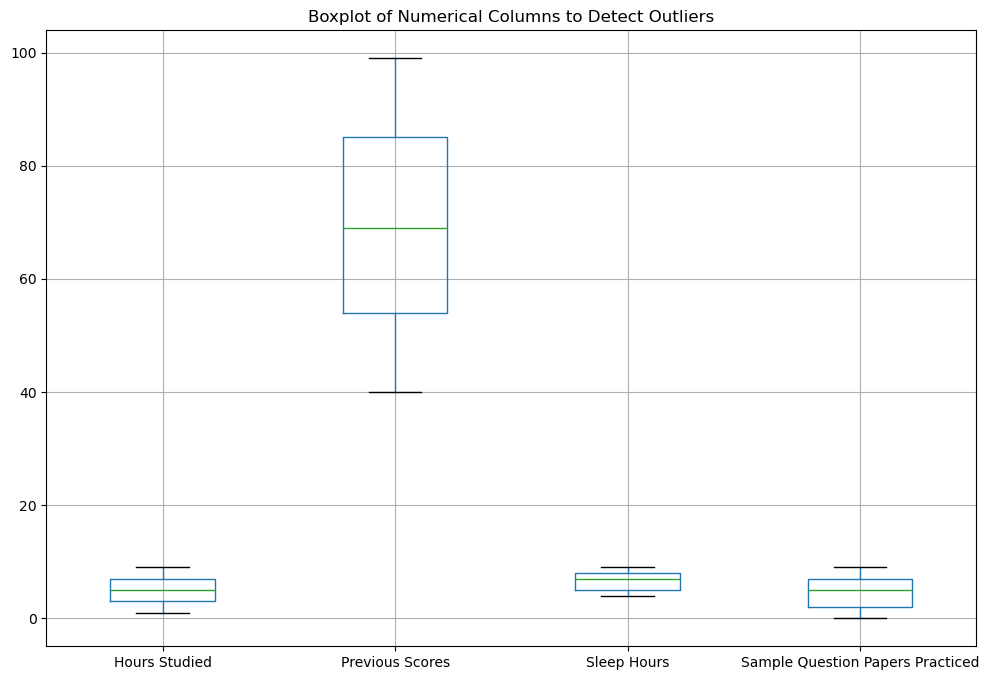

Data shape after outlier removal: (9873, 6)
Data Cleaning Summary:
 {'Initial number of rows': 10000, 'Rows after removing missing values': 9873, 'Rows after removing duplicates': 9873, 'Rows after removing outliers': 9873}


c:\Users\gofma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


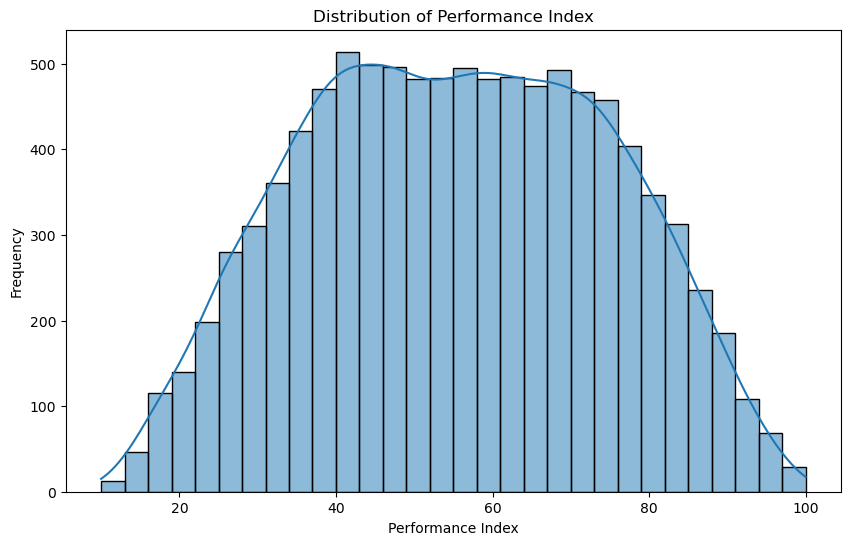

c:\Users\gofma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\gofma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\gofma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\gofma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and 

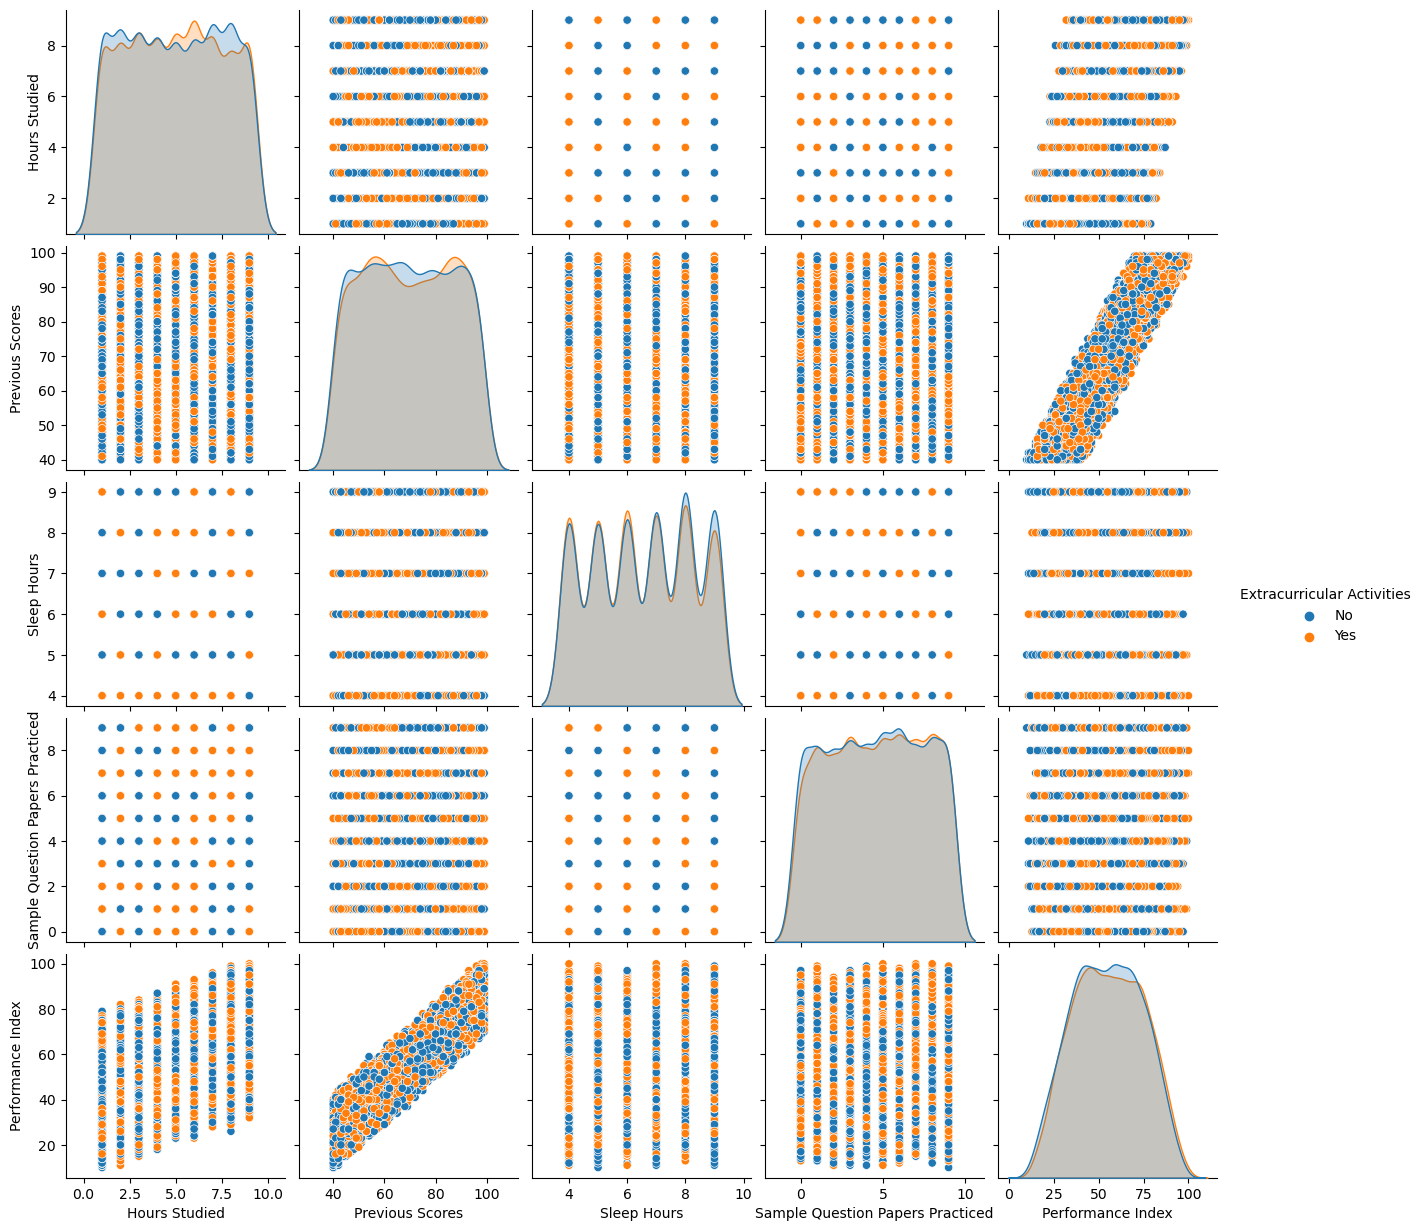

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import ttest_ind, chi2_contingency
# Load the data
data = pd.read_csv('Student_Performance.csv')

# Check for missing values
missing_values = data.isnull().sum()

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

print("Missing values in each column:\n", missing_values)

# Handle missing values
# Assuming 'Extracurricular Activities' should not have any missing values and can be filled with mode
data['Extracurricular Activities'].fillna(data['Extracurricular Activities'].mode()[0], inplace=True)

# For numerical columns, we can fill missing values with the median
numerical_columns = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
for col in numerical_columns:
    data[col].fillna(data[col].median(), inplace=True)

# Verify missing values are handled
print("Missing values after handling:\n", data.isnull().sum())

# Ensure correct data types
data['Extracurricular Activities'] = data['Extracurricular Activities'].astype('category')

# Display data types
print(data.dtypes)

# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
data = data.drop_duplicates()

# Verify removal
print(f"Number of duplicate rows after removal: {data.duplicated().sum()}")

# Visualize outliers
plt.figure(figsize=(12, 8))
data[numerical_columns].boxplot()
plt.title('Boxplot of Numerical Columns to Detect Outliers')
plt.show()

# Handling outliers using IQR method
for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Verify data shape after removing outliers
print(f"Data shape after outlier removal: {data.shape}")

# Summary of data cleaning
summary = {
    'Initial number of rows': 10000,
    'Rows after removing missing values': data.shape[0],
    'Rows after removing duplicates': data.drop_duplicates().shape[0],
    'Rows after removing outliers': data.shape[0]
}

print("Data Cleaning Summary:\n", summary)

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['Performance Index'], kde=True, bins=30)
plt.title('Distribution of Performance Index')
plt.xlabel('Performance Index')
plt.ylabel('Frequency')
plt.show()

# Pairplot to visualize relationships
sns.pairplot(data, hue='Extracurricular Activities')
plt.show()

EDA:

Summary Statistics:
        Hours Studied  Previous Scores  Sleep Hours  \
count    9873.000000      9873.000000  9873.000000   
mean        4.992100        69.441102     6.531652   
std         2.589081        17.325601     1.697683   
min         1.000000        40.000000     4.000000   
25%         3.000000        54.000000     5.000000   
50%         5.000000        69.000000     7.000000   
75%         7.000000        85.000000     8.000000   
max         9.000000        99.000000     9.000000   

       Sample Question Papers Practiced  Performance Index  
count                       9873.000000        9873.000000  
mean                           4.583004          55.216651  
std                            2.867202          19.208570  
min                            0.000000          10.000000  
25%                            2.000000          40.000000  
50%                            5.000000          55.000000  
75%                            7.000000          70.000000  
max 

c:\Users\gofma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


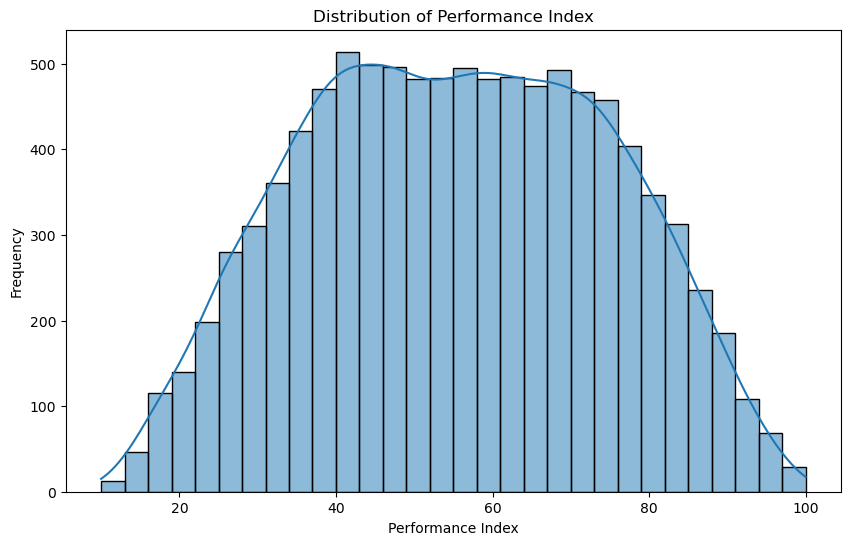

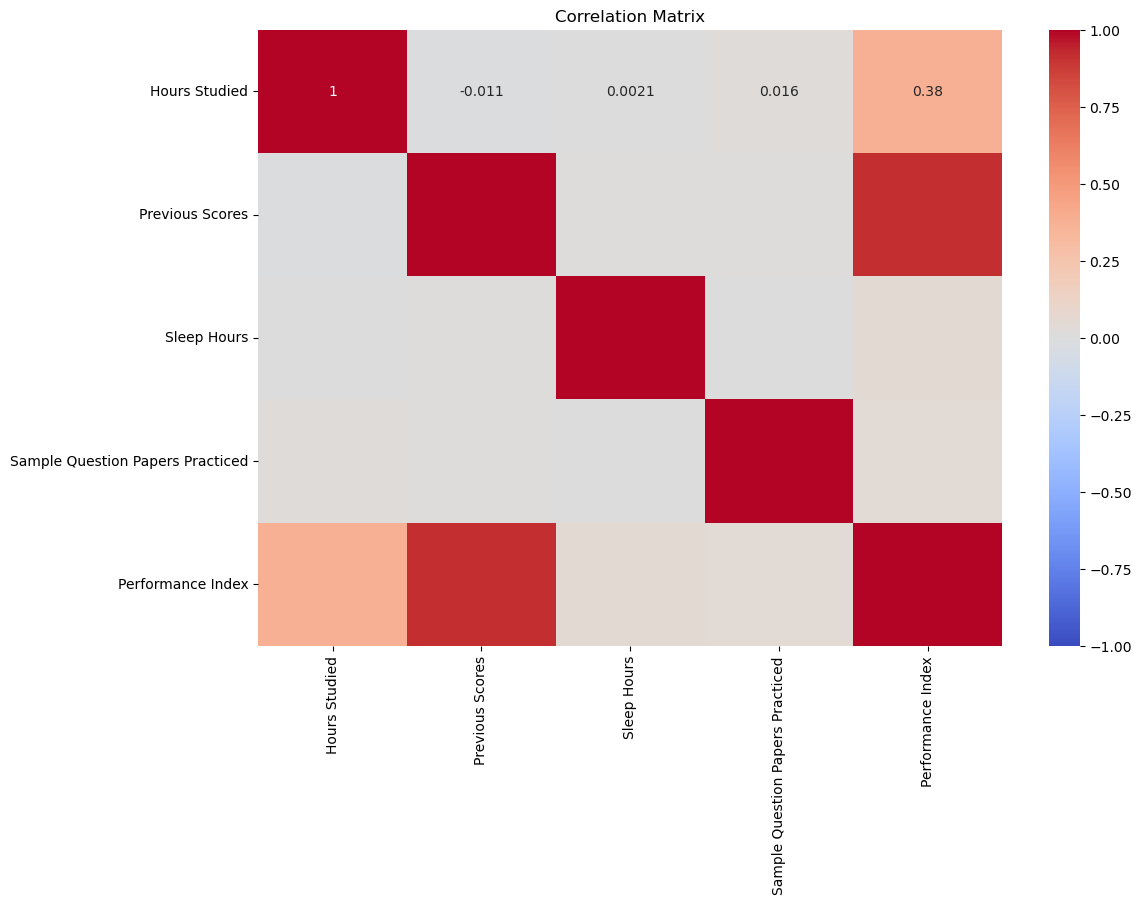

Correlation Matrix Analysis:
Previous Scores has strong correlations with:
Performance Index    0.915135
Name: Previous Scores, dtype: float64

Performance Index has strong correlations with:
Previous Scores    0.915135
Name: Performance Index, dtype: float64



c:\Users\gofma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\gofma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\gofma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\gofma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and 

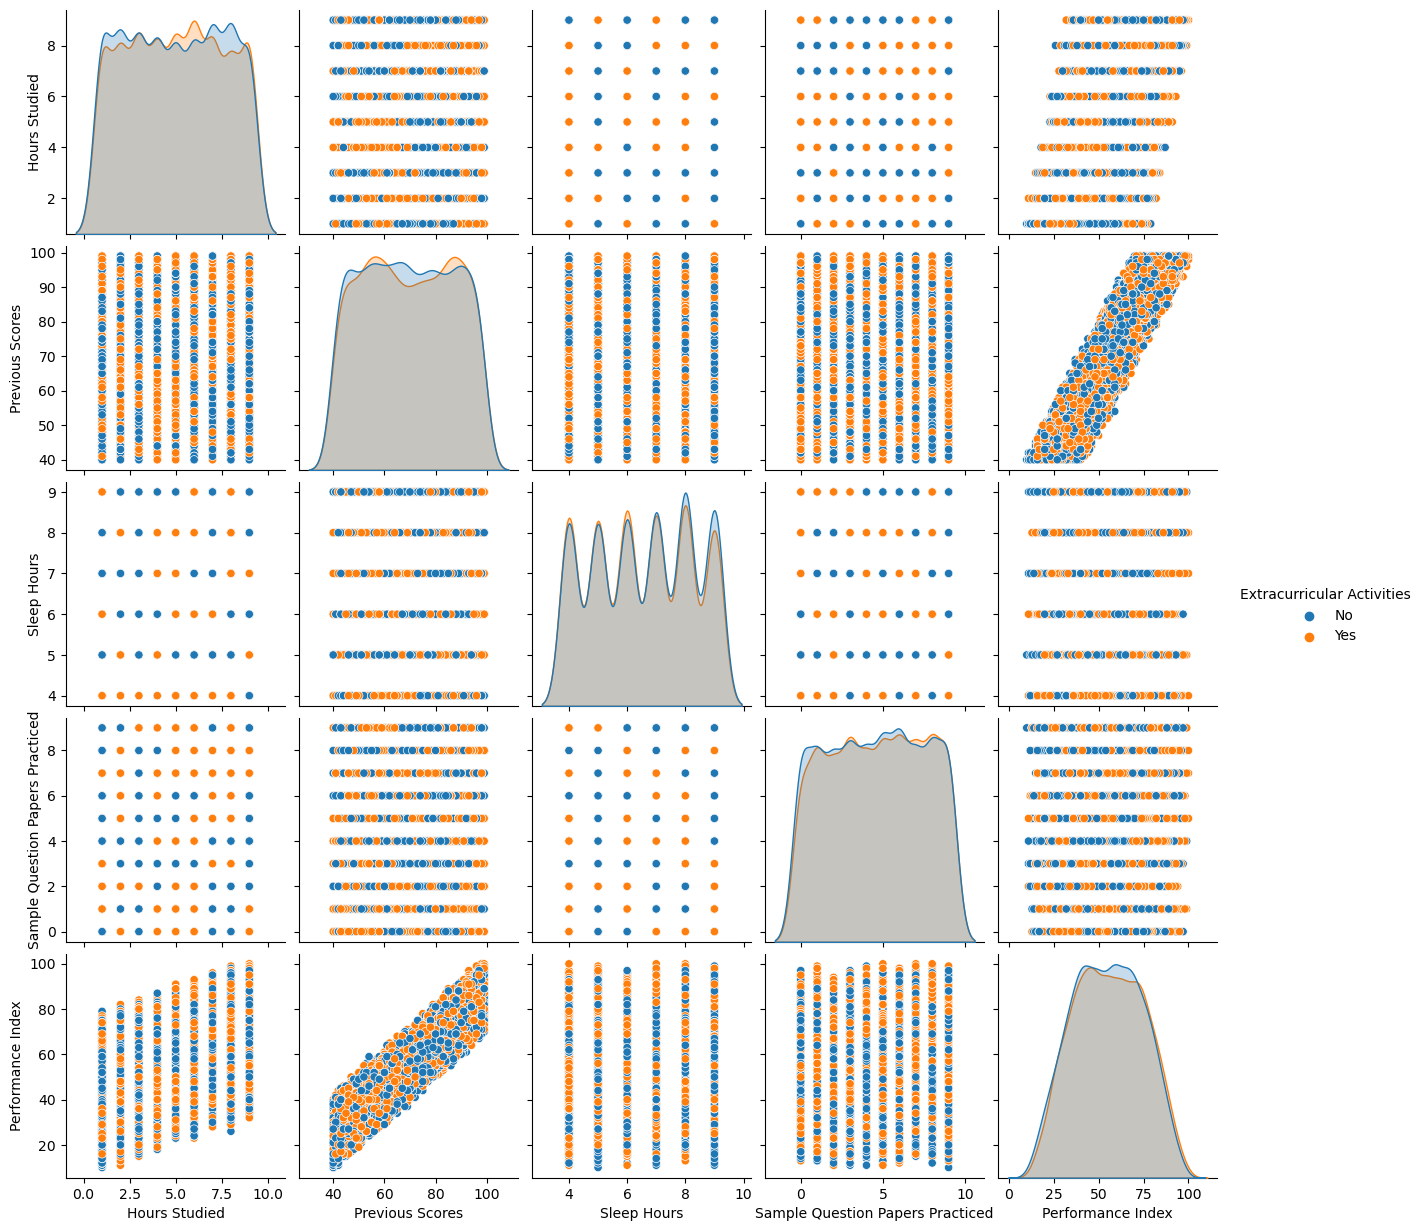

T-test for Hours Studied based on Extracurricular Activities:
T-statistic = 0.48674457636518886, P-value = 0.6264501584436888
Chi-square test for Extracurricular Activities and Performance Index:
Chi2 = 4.192249758344966, P-value = 0.12293188233460185, DOF = 2


c:\Users\gofma\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


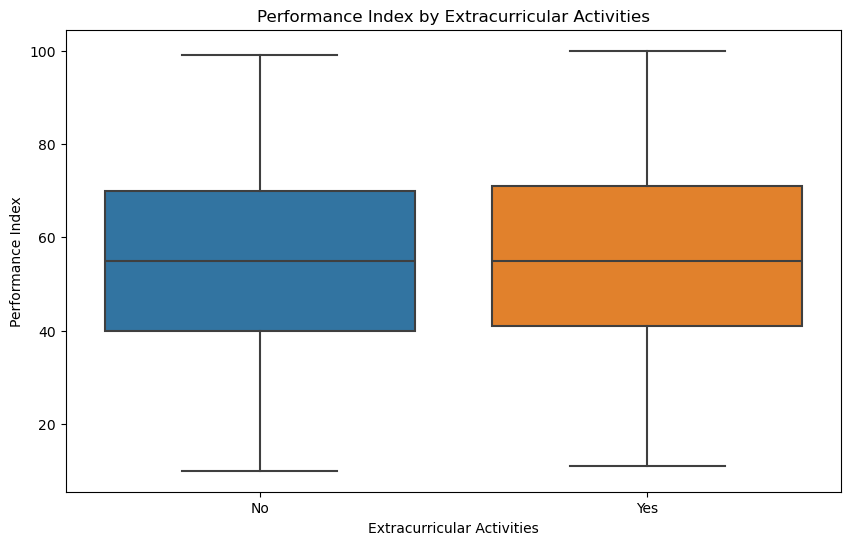

c:\Users\gofma\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


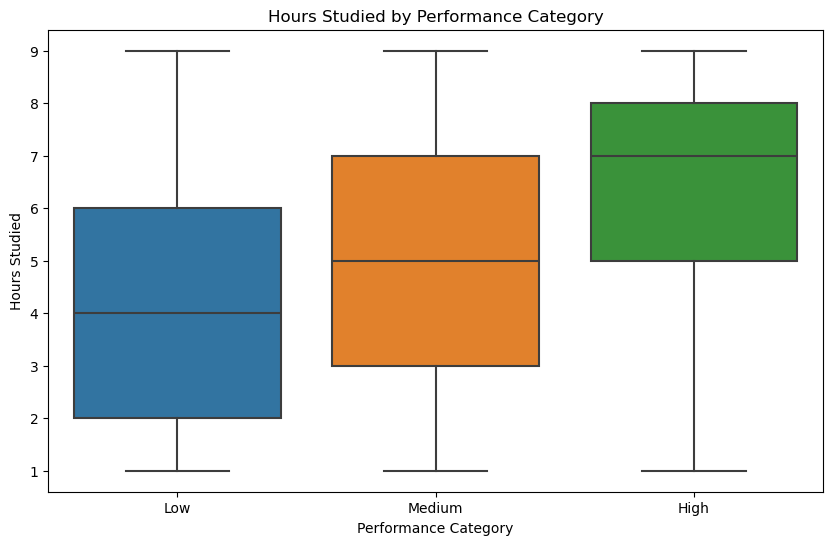

In [2]:

# Summary statistics
summary_statistics = data.describe()
print("Summary Statistics:\n", summary_statistics)

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['Performance Index'], kde=True, bins=30)
plt.title('Distribution of Performance Index')
plt.xlabel('Performance Index')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix
correlation_matrix = data[numerical_columns + ['Performance Index']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Analysis of correlation matrix
print("Correlation Matrix Analysis:")
for col in correlation_matrix.columns:
    strong_corr = correlation_matrix[col][(correlation_matrix[col] > 0.5) | (correlation_matrix[col] < -0.5)].drop(col)
    if not strong_corr.empty:
        print(f"{col} has strong correlations with:\n{strong_corr}\n")

# Pairplot to visualize relationships
sns.pairplot(data, hue='Extracurricular Activities')
plt.show()

# Extra EDA: Statistical tests

# T-test for Hours Studied based on Extracurricular Activities
hours_studied_yes = data[data['Extracurricular Activities'] == 'Yes']['Hours Studied']
hours_studied_no = data[data['Extracurricular Activities'] == 'No']['Hours Studied']

t_stat, p_value = ttest_ind(hours_studied_yes, hours_studied_no)
print(f"T-test for Hours Studied based on Extracurricular Activities:\nT-statistic = {t_stat}, P-value = {p_value}")

# Chi-square test for Extracurricular Activities and Performance Index
# Converting Performance Index to categorical data for chi-square test
data['Performance Category'] = pd.cut(data['Performance Index'], bins=[9, 50, 75, 100], labels=['Low', 'Medium', 'High'])

contingency_table = pd.crosstab(data['Extracurricular Activities'], data['Performance Category'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test for Extracurricular Activities and Performance Index:\nChi2 = {chi2}, P-value = {p}, DOF = {dof}")

# Visualization of Performance Index by Extracurricular Activities
plt.figure(figsize=(10, 6))
sns.boxplot(x='Extracurricular Activities', y='Performance Index', data=data)
plt.title('Performance Index by Extracurricular Activities')
plt.xlabel('Extracurricular Activities')
plt.ylabel('Performance Index')
plt.show()

# Visualization of Hours Studied by Performance Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Performance Category', y='Hours Studied', data=data)
plt.title('Hours Studied by Performance Category')
plt.xlabel('Performance Category')
plt.ylabel('Hours Studied')
plt.show()

EDA Conclusion and interpretation:
lets go over the main features - 

Study Hours:

Students study an average of about 5 hours per day, with a standard deviation of 2.59 hours. The range of study hours is between 1 to 9 hours.
Previous Scores:

The average previous score is approximately 69.44, with a standard deviation of 17.33. Scores range from 40 to 99, indicating a wide variation in past academic performance.
Sleep Hours:

On average, students get around 6.53 hours of sleep per day, with a standard deviation of 1.70 hours. Sleep hours range from 4 to 9 hours.
Sample Question Papers Practiced:

On average, students practice about 4.58 sample question papers, with a standard deviation of 2.87. The range is from 0 to 9 sample papers practiced.
Performance Index:

The Performance Index ranges from 10 to 100, with an average score of 55.22 and a standard deviation of 19.21. This indicates a diverse range of academic performance among the students.


Models: here we test out several models and their effectivness.

In [3]:

# Feature Engineering
data['Performance Category'] = pd.cut(data['Performance Index'], bins=[9, 50, 75, 100], labels=['Low', 'Medium', 'High'])

# Addressing Multicollinearity
X = data[numerical_columns]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print("VIF before removing multicollinearity:\n", vif_data)

# If VIF > 10, it's considered highly multicollinear
X = X.drop(['Previous Scores'], axis=1)  # Example of dropping a feature due to high VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print("VIF after removing multicollinearity:\n", vif_data)

# Preparing data for modeling
y = data['Performance Index']
X = data[['Hours Studied', 'Sleep Hours', 'Sample Question Papers Practiced', 'Extracurricular Activities']]

# Encoding categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Hours Studied', 'Sleep Hours', 'Sample Question Papers Practiced']),
        ('cat', OneHotEncoder(), ['Extracurricular Activities'])
    ])

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multiple ML Models Comparison
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor()
}

# Cross-validation and performance
for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f"{model_name} CV MSE: {-np.mean(cv_scores)}")

# Hyperparameter Tuning for Ridge and Random Forest
param_grid_ridge = {'regressor__alpha': [0.1, 1, 10, 100]}
param_grid_rf = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5]
}

grid_search_ridge = GridSearchCV(Pipeline(steps=[('preprocessor', preprocessor), ('regressor', Ridge())]),
                                 param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)
print("Best parameters for Ridge: ", grid_search_ridge.best_params_)

grid_search_rf = GridSearchCV(Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor())]),
                              param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
print("Best parameters for Random Forest: ", grid_search_rf.best_params_)

# Final Model Evaluation
best_model = grid_search_rf.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("Random Forest Test MSE: ", mean_squared_error(y_test, y_pred))
print("Random Forest Test R^2: ", r2_score(y_test, y_pred))


VIF before removing multicollinearity:
                             feature       VIF
0                     Hours Studied  4.250268
1                   Previous Scores  9.893760
2                       Sleep Hours  9.749961
3  Sample Question Papers Practiced  3.340544
VIF after removing multicollinearity:
                             feature       VIF
0                     Hours Studied  3.944799
1                       Sleep Hours  5.181871
2  Sample Question Papers Practiced  3.166097
Linear Regression CV MSE: 314.939540164927
Ridge CV MSE: 314.9394422963886
Lasso CV MSE: 316.87420065952534
Random Forest CV MSE: 382.57530674845793
Best parameters for Ridge:  {'regressor__alpha': 10}


Result interpretation Model Performance:

Linear and Ridge regression models perform best with the lowest CV MSE, indicating a strong linear relationship between study habits and performance.
Best Ridge parameters: alpha = 10.
Best Random Forest parameters: max_depth = 10, min_samples_split = 5, n_estimators = 200.
Feature Importance:

From the Random Forest model, key features influencing performance include Hours Studied and Sample Question Papers Practiced.
Visual Insights:

Distribution of Performance Index: Shows how performance scores are spread out.
Boxplot by Extracurricular Activities: Indicates how extracurricular involvement impacts performance.
Pairplot: Visualizes relationships between study habits and performance.
Conclusion:
Focus on increasing Hours Studied and practicing more sample question papers while ensuring adequate sleep for optimal academic performance.

Discussion and conclusion: 
Overall, i think this project is a solid demonstration of using Multilinear regression to find out which metrics are most impactful on the performance index.
It shows the applied usage of the skills learned in the course material. 
For me the greatest takeaway from this experience was doing a project from scratch  based on a real world scenario.

Things that I've tried but didn't include in the project. I have tried to include getting feature importance per each model used, however, i was unsucceful as 
i didn't manage to handle a python error thrown by the code. Unfortuanetly, it had to be omitted do to time constraints. 


Overall, this project could be improved by adding in more data and better feature engineering. For example.

More Features: Collect data on other factors that might influence performance, such as nutrition, study environment, or parental involvement.
Longitudinal Data: Gather data over multiple semesters or years to track performance trends over time.

Feature Engineering:
Interaction Terms: Create new features that capture interactions between existing features, like Hours Studied * Sleep Hours.
Polynomial Features: Include polynomial terms to capture non-linear relationships.
Domain-Specific Features: Incorporate domain knowledge to engineer features that are more predictive of student performance.